# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

In [2]:
# Import API key
#from api_keys import api_key
api_key = "cf9615796a060996e1d408b88d09b361"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [4]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
#Test query_url
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=cf9615796a060996e1d408b88d09b361&units=imperial&q=


## Generate Cities List

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [12]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

567

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
lat = []
lon = []
date = []
clouds = []
country = []
humidity = []
temp_max = []
wind_speed = []
city_list = []
record_cnt = 0

for city in cities:
    record_cnt += 1
    try:
        response = requests.get(query_url + city).json()
        print(f"processing {record_cnt} for city {city}")
        date.append(response['dt'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_list.append(city)
            
    except Exception:
        print(f"city not found")

processing 1 for city labytnangi
processing 2 for city solovetskiy
city not found
processing 3 for city puerto ayora
processing 4 for city mataura
processing 5 for city yellowknife
processing 6 for city new norfolk
processing 7 for city kloulklubed
processing 8 for city gondar
processing 9 for city bambous virieux
processing 10 for city raga
city not found
processing 11 for city cherskiy
processing 12 for city porirua
processing 13 for city port hedland
processing 14 for city bluff
processing 15 for city mergui
city not found
processing 16 for city taolanaro
city not found
processing 17 for city albany
processing 18 for city saskylakh
processing 19 for city kavieng
processing 20 for city barentsburg
city not found
processing 21 for city codrington
processing 22 for city torbay
processing 23 for city punta arenas
processing 24 for city georgetown
processing 25 for city rikitea
processing 26 for city bredasdorp
processing 27 for city iqaluit
processing 28 for city bundaberg
processing 29

processing 237 for city tsihombe
city not found
processing 238 for city sainte-maxime
processing 239 for city kuching
processing 240 for city texarkana
processing 241 for city sentyabrskiy
city not found
processing 242 for city caboolture
processing 243 for city svetlyy
city not found
processing 244 for city flinders
processing 245 for city jacala
processing 246 for city alberton
processing 247 for city lumajang
processing 248 for city belaya gora
processing 249 for city shingu
processing 250 for city uspenka
processing 251 for city vaitupu
city not found
processing 252 for city lazaro cardenas
processing 253 for city netivot
processing 254 for city marienburg
processing 255 for city candido mota
processing 256 for city henties bay
processing 257 for city cayenne
processing 258 for city fort nelson
processing 259 for city zaoyang
processing 260 for city eydhafushi
processing 261 for city katangli
processing 262 for city santa cruz
processing 263 for city nanortalik
processing 264 for c

processing 471 for city lixourion
processing 472 for city tabuk
processing 473 for city saint-pierre
processing 474 for city yasinya
processing 475 for city vestmannaeyjar
processing 476 for city tahoua
processing 477 for city quang ngai
processing 478 for city namatanai
processing 479 for city mildura
processing 480 for city nagato
processing 481 for city ahipara
processing 482 for city zheleznodorozhnyy
processing 483 for city sterling
processing 484 for city marzuq
processing 485 for city bacuit
city not found
processing 486 for city tubruq
city not found
processing 487 for city lhuntshi
city not found
processing 488 for city luwuk
processing 489 for city luanda
processing 490 for city belogorsk
processing 491 for city saleaula
city not found
processing 492 for city floro
processing 493 for city road town
processing 494 for city hami
processing 495 for city ahuimanu
processing 496 for city hays
processing 497 for city mocambique
city not found
processing 498 for city myitkyina
proce

In [14]:
pprint(response)

{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 20.76, 'lon': -156.45},
 'dt': 1562981411,
 'id': 5849297,
 'main': {'humidity': 43,
          'pressure': 1013,
          'temp': 81.88,
          'temp_max': 89.6,
          'temp_min': 77},
 'name': 'Kihei',
 'sys': {'country': 'US',
         'id': 7879,
         'message': 0.0059,
         'sunrise': 1562946732,
         'sunset': 1562994615,
         'type': 1},
 'timezone': -36000,
 'visibility': 16093,
 'weather': [{'description': 'smoke',
              'icon': '50n',
              'id': 711,
              'main': 'Smoke'}],
 'wind': {'deg': 50, 'gust': 15.9, 'speed': 26.4}}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dict = {
    "city_list": city_list,
    "lat": lat,
    "lon": lon,
    "date": date,
    "clouds": clouds,
    "country": country,
    "humidity": humidity,
    "temp_max": temp_max,
    "wind_speed": wind_speed
    
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,city_list,lat,lon,date,clouds,country,humidity,temp_max,wind_speed
0,labytnangi,66.66,66.39,1562981692,0,RU,48,55.88,3.74
1,puerto ayora,-0.74,-90.35,1562981692,20,EC,61,77.00,13.87
2,mataura,-46.19,168.86,1562981693,98,NZ,72,54.00,1.99
3,yellowknife,62.45,-114.38,1562981693,75,CA,47,57.20,9.17
4,new norfolk,-42.78,147.06,1562981693,75,AU,87,43.00,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

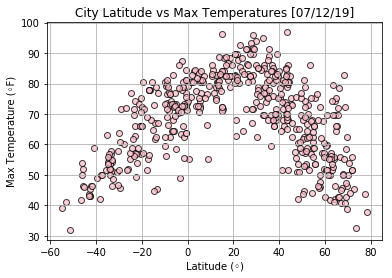

In [25]:
plt.scatter(lat, temp_max, c="pink", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude (◦)")
plt.ylabel("Max Temperature (◦F)")
plt.title("City Latitude vs Max Temperatures [07/12/19]")
plt.savefig("./lat_temp_plot.png")

#### Latitude vs. Humidity Plot

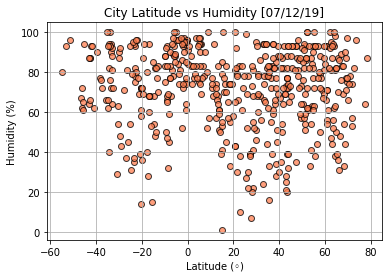

In [26]:
plt.scatter(lat, humidity, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude (◦)")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity [07/12/19]")
plt.savefig("./lat_hum_plot.png")

#### Latitude vs. Cloudiness Plot

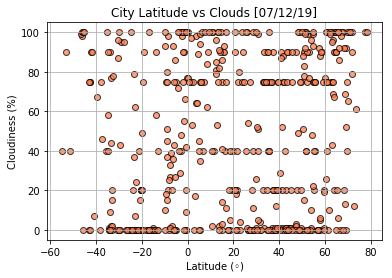

In [27]:
plt.scatter(lat, clouds, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude (◦)")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Clouds [07/12/19]")
plt.savefig("./lat_clouds_plot.png")

#### Latitude vs. Wind Speed Plot

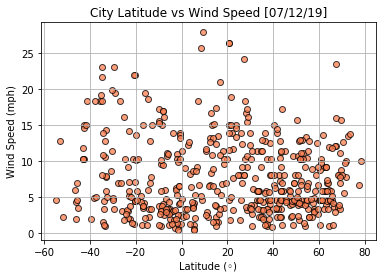

In [28]:
plt.scatter(lat, wind_speed, c="coral", alpha=0.75,edgecolors="black",label="lat")
plt.grid()

# Incorporate the other graph properties
# add labels and title
plt.xlabel("Latitude (◦)")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed [07/12/19]")
plt.savefig("./lat_wind_plot.png")